<a href="https://colab.research.google.com/github/SaiKiranGandham/FUTURE_ML_01/blob/main/AI_Powered_Sales_Forecasting_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data And Imports

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For interactive plots (optional)
# %matplotlib inline







In [ ]:
# Create a date range (6 months of daily data)
date_range = pd.date_range(start='2023-01-01', periods=180, freq='D')

# Simulate sales using a Poisson distribution (with weekly pattern)
np.random.seed(42)
sales = np.random.poisson(lam=200, size=180)

# Build DataFrame
df = pd.DataFrame({'date': date_range, 'sales': sales})

# View head
df.head()





,date,sales
0,2023-01-01,195
1,2023-01-02,210
2,2023-01-03,184
3,2023-01-04,204
4,2023-01-05,216


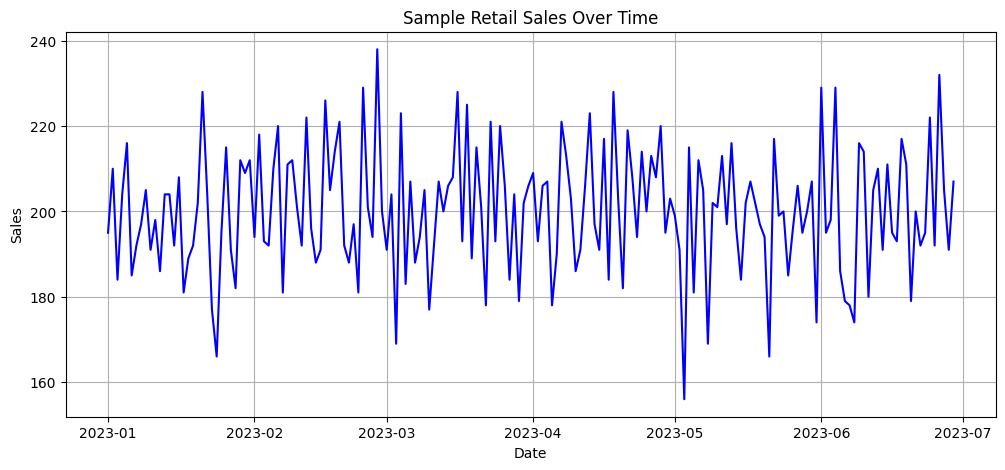

In [ ]:

# Set datetime index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Basic visualization
plt.figure(figsize=(12,5))
plt.plot(df.index, df['sales'], color='blue')
plt.title('Sample Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()





Time Series Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Generate sample sales data
date_range = pd.date_range(start='2023-01-01', periods=180, freq='D')
np.random.seed(0)
sales = np.random.poisson(lam=200, size=len(date_range))

# Create DataFrame
df = pd.DataFrame({'date': date_range, 'sales': sales})
df.head()


,date,sales
0,2023-01-01,202
1,2023-01-02,204
2,2023-01-03,197
3,2023-01-04,197
4,2023-01-05,239


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = df.index.dayofweek >= 5
df.head()


,sales,day,month,dayofweek,is_weekend
date,,,,,
2023-01-01,202,1,1,6,True
2023-01-02,204,2,1,0,False
2023-01-03,197,3,1,1,False
2023-01-04,197,4,1,2,False
2023-01-05,239,5,1,3,False


In [ ]:
df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df.head(10)


,sales,day,month,dayofweek,is_weekend,lag_1,lag_7
date,,,,,,,
2023-01-01,202,1,1,6,True,NaN,NaN
2023-01-02,204,2,1,0,False,202.0,NaN
2023-01-03,197,3,1,1,False,204.0,NaN
2023-01-04,197,4,1,2,False,197.0,NaN
2023-01-05,239,5,1,3,False,197.0,NaN
2023-01-06,213,6,1,4,False,239.0,NaN
2023-01-07,203,7,1,5,True,213.0,NaN
2023-01-08,174,8,1,6,True,203.0,202.0
2023-01-09,212,9,1,0,False,174.0,204.0


In [ ]:
df['rolling_mean_3'] = df['sales'].rolling(window=3).mean()
df['rolling_std_7'] = df['sales'].rolling(window=7).std()
df.tail(10)


,sales,day,month,dayofweek,is_weekend,lag_1,lag_7,rolling_mean_3,rolling_std_7
date,,,,,,,,,
2023-06-20,172,20,6,1,False,205.0,211.0,197.000000,19.983326
2023-06-21,189,21,6,2,False,172.0,189.0,188.666667,19.983326
2023-06-22,194,22,6,3,False,189.0,198.0,185.000000,20.239048
2023-06-23,196,23,6,4,False,194.0,217.0,193.000000,19.432423
2023-06-24,218,24,6,5,True,196.0,233.0,202.666667,15.713203
2023-06-25,193,25,6,6,True,218.0,214.0,202.333333,14.138768
2023-06-26,205,26,6,0,False,193.0,205.0,205.333333,14.138768
2023-06-27,173,27,6,1,False,205.0,172.0,190.333333,13.866712
2023-06-28,188,28,6,2,False,173.0,189.0,188.666667,13.948886


In [ ]:
df['expanding_mean'] = df['sales'].expanding().mean()
df['expanding_max'] = df['sales'].expanding().max()


In [ ]:
df['diff_1'] = df['sales'].diff(periods=1)


In [ ]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dow_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)


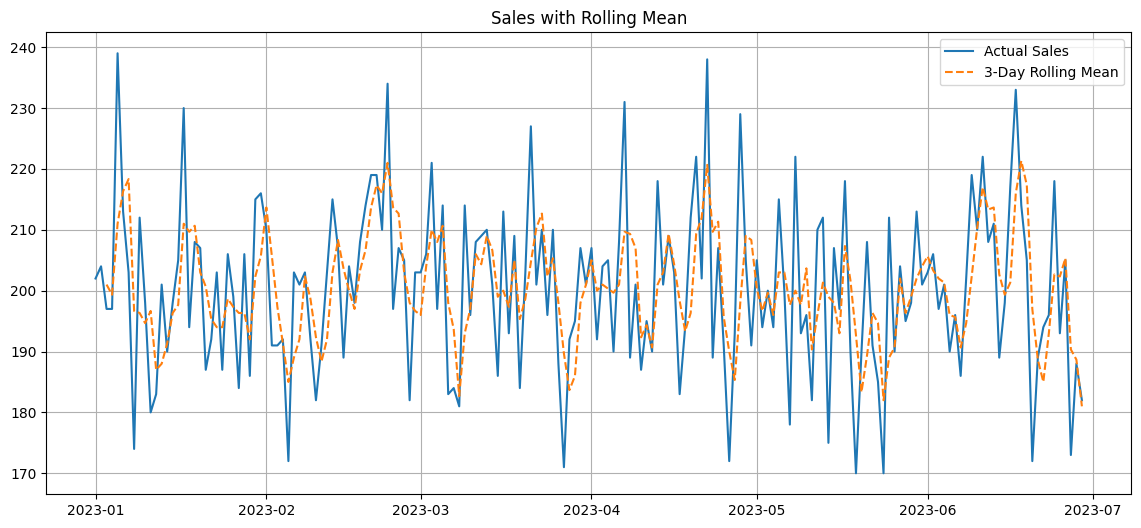

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(df['sales'], label='Actual Sales')
plt.plot(df['rolling_mean_3'], label='3-Day Rolling Mean', linestyle='--')
plt.title("Sales with Rolling Mean")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df.dropna(inplace=True)
df.head()


,sales,day,month,dayofweek,is_weekend,lag_1,lag_7,rolling_mean_3,rolling_std_7,expanding_mean,expanding_max,diff_1,month_sin,month_cos,dow_sin,dow_cos
date,,,,,,,,,,,,,,,,
2023-01-08,174,8,1,6,True,203.0,202.0,196.666667,19.599563,203.625000,239.0,-29.0,0.5,0.866025,-0.781831,0.623490
2023-01-09,212,9,1,0,False,174.0,204.0,196.333333,19.841035,204.555556,239.0,38.0,0.5,0.866025,0.000000,1.000000
2023-01-10,198,10,1,1,False,212.0,197.0,194.666667,19.777332,203.900000,239.0,-14.0,0.5,0.866025,0.781831,0.623490
2023-01-11,180,11,1,2,False,198.0,197.0,196.666667,21.876275,201.727273,239.0,-18.0,0.5,0.866025,0.974928,-0.222521
2023-01-12,183,12,1,3,False,180.0,239.0,187.000000,15.787276,200.166667,239.0,3.0,0.5,0.866025,0.433884,-0.900969


Train /Test Split

In [ ]:
print(df.shape)
print(df.index.min(), "to", df.index.max())


(173, 16)
2023-01-08 00:00:00 to 2023-06-29 00:00:00


In [ ]:
# Sort by date just to be safe
df.sort_index(inplace=True)

# Define train size
train_size = int(len(df) * 0.8)

# Split
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print shape
print("Train size:", train.shape)
print("Test size:", test.shape)


Train size: (138, 16)
Test size: (35, 16)


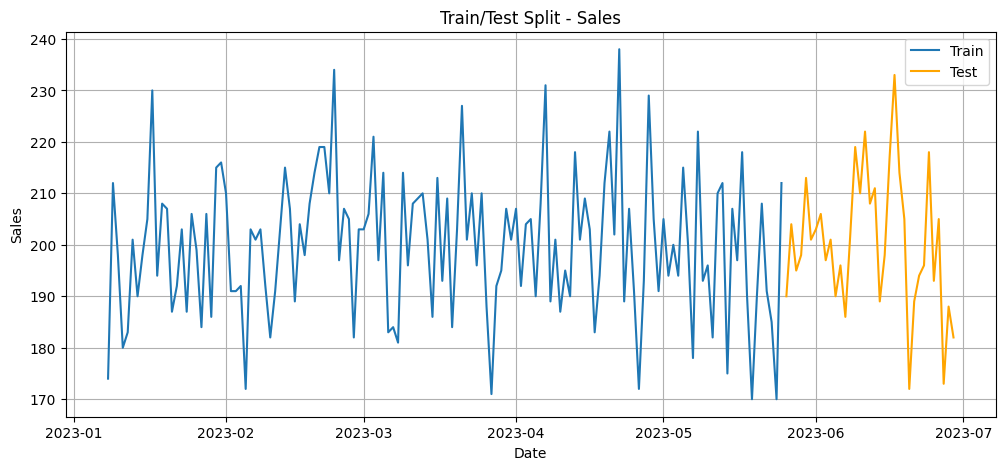

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Test', color='orange')
plt.title("Train/Test Split - Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


Train and predict

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
date_range = pd.date_range(start='2023-01-01', periods=180, freq='D')
np.random.seed(42)
sales = np.random.poisson(lam=200, size=180)
df = pd.DataFrame({'date': date_range, 'sales': sales})
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [ ]:
# Lag & Rolling Features
df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df['rolling_mean_3'] = df['sales'].rolling(window=3).mean()
df['rolling_std_7'] = df['sales'].rolling(window=7).std()

# Date Parts
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

# Drop NA
df.dropna(inplace=True)


In [ ]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Features & target
X_train = train.drop(columns='sales')
y_train = train['sales']
X_test = test.drop(columns='sales')
y_test = test['sales']


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}')


MSE: 120.90, MAE: 9.09


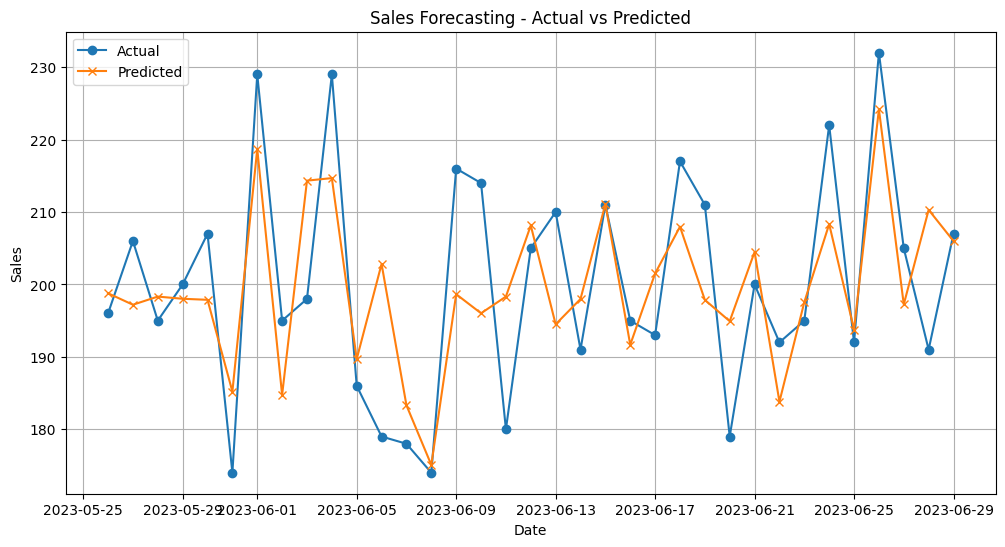

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title('Sales Forecasting - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Evaluate Forecast

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("📊 Forecast Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


📊 Forecast Evaluation Metrics:
Mean Absolute Error (MAE): 9.09
Root Mean Squared Error (RMSE): 11.00
R-squared (R²) Score: 0.49


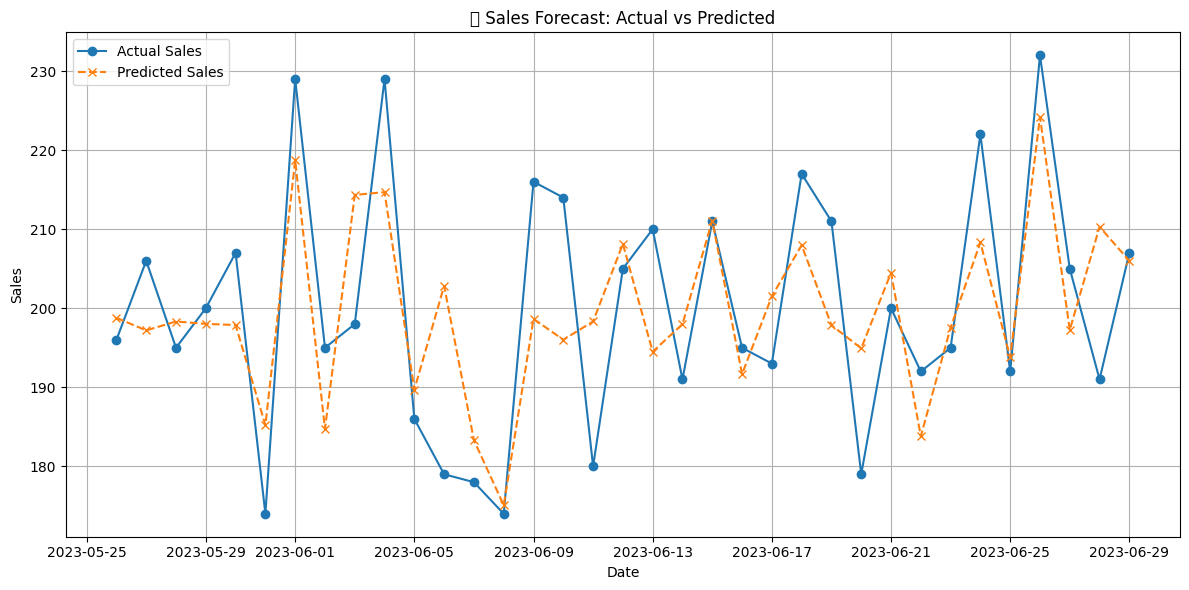

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Sales', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Sales', linestyle='--', marker='x')
plt.title("📈 Sales Forecast: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
results = pd.DataFrame({
    'Date': y_test.index,
    'Actual_Sales': y_test.values,
    'Predicted_Sales': y_pred
})
results.set_index('Date', inplace=True)
results.head()


,Actual_Sales,Predicted_Sales
Date,,
2023-05-26,196,198.783352
2023-05-27,206,197.198191
2023-05-28,195,198.323196
2023-05-29,200,198.022921
2023-05-30,207,197.877897


Adding Holidays

In [ ]:
from prophet import Prophet
import pandas as pd


In [ ]:

df_prophet = df.reset_index()[['date', 'sales']]
df_prophet.columns = ['ds', 'y']


In [ ]:
# Example holidays
holidays = pd.DataFrame({
    'holiday': 'festival',
    'ds': pd.to_datetime([
        '2023-01-26',  # Republic Day
        '2023-03-08',  # Holi
        '2023-08-15',  # Independence Day
        '2023-10-24',  # Dussehra
        '2023-11-12',  # Diwali
        '2023-12-25',  # Christmas
    ]),
    'lower_window': 0,
    'upper_window': 1  # 1 day after too
})


In [ ]:
m = Prophet(holidays=holidays)
m.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_jrfz40/teswydde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_jrfz40/ddov8pa_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5587', 'data', 'file=/tmp/tmph_jrfz40/teswydde.json', 'init=/tmp/tmph_jrfz40/ddov8pa_.json', 'output', 'file=/tmp/tmph_jrfz40/prophet_model0y1ksxne/prophet_model-20250707142634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Generate future dates
future = m.make_future_dataframe(periods=30)  # forecast 30 days ahead
forecast = m.predict(future)


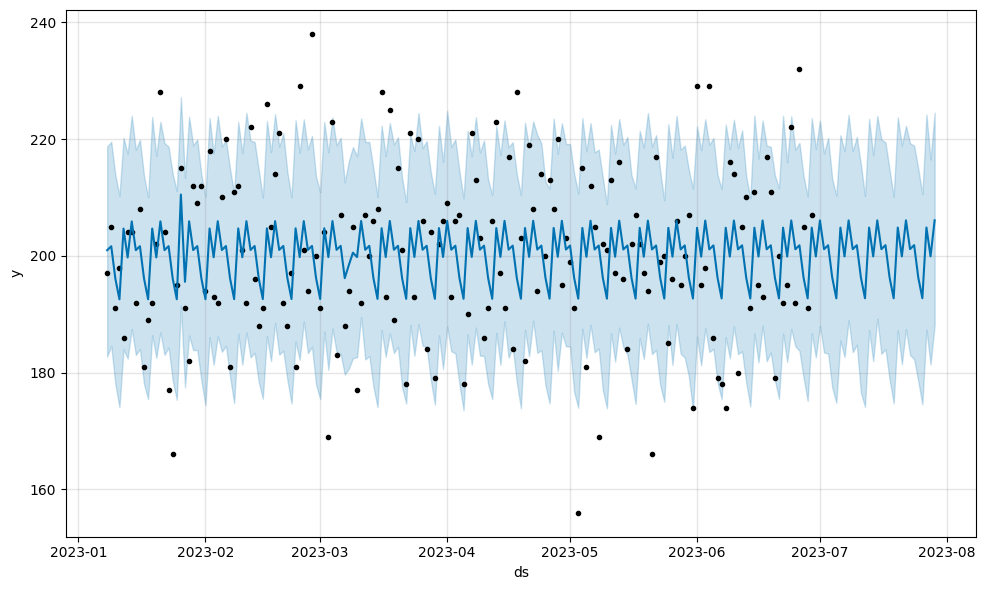

In [ ]:
fig = m.plot(forecast)


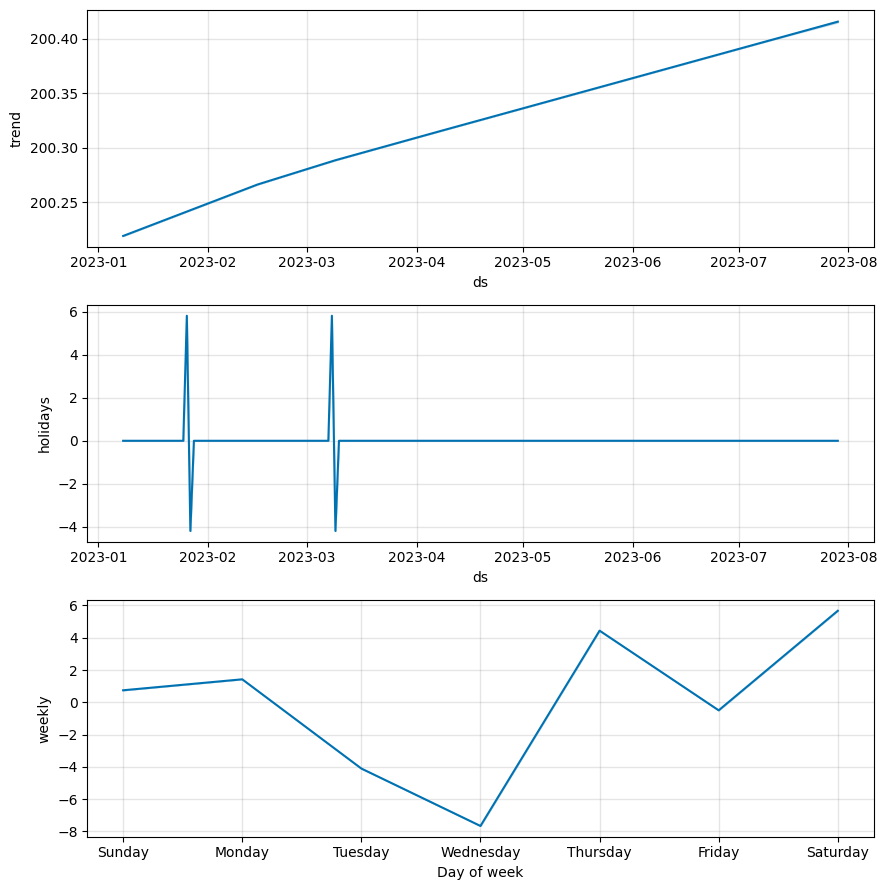

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.make_holidays import make_holidays_df
make_holidays_df(year_list=[2023], country='IN')


,ds,holiday
0,2023-01-26,Republic Day
1,2023-08-15,Independence Day
2,2023-10-02,Gandhi Jayanti
3,2023-05-05,Buddha Purnima
4,2023-11-12,Diwali
5,2023-09-07,Janmashtami
6,2023-10-24,Dussehra
7,2023-04-04,Mahavir Jayanti
8,2023-02-18,Maha Shivaratri
9,2023-11-27,Guru Nanak Jayanti


Make Future Dataframe

In [ ]:
from prophet import Prophet
import pandas as pd


In [ ]:
# Format your dataframe
df_prophet = df.reset_index()[['date', 'sales']]
df_prophet.columns = ['ds', 'y']


In [ ]:
model = Prophet()  # Optional: add holidays, seasonality, etc.
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_jrfz40/t2b6rfvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph_jrfz40/eyx1zbmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42162', 'data', 'file=/tmp/tmph_jrfz40/t2b6rfvc.json', 'init=/tmp/tmph_jrfz40/eyx1zbmt.json', 'output', 'file=/tmp/tmph_jrfz40/prophet_modelcfbm731t/prophet_model-20250707142656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:26:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:26:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast for next 30 days
future = model.make_future_dataframe(periods=30, freq='D')  # D = Daily
future.tail()


,ds
198,2023-07-25
199,2023-07-26
200,2023-07-27
201,2023-07-28
202,2023-07-29


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
198,2023-07-25,196.293117,177.948949,214.745376
199,2023-07-26,192.978339,173.505582,211.470954
200,2023-07-27,204.880185,186.813016,222.219845
201,2023-07-28,199.711482,180.883027,217.300601
202,2023-07-29,206.038388,187.834740,223.126612


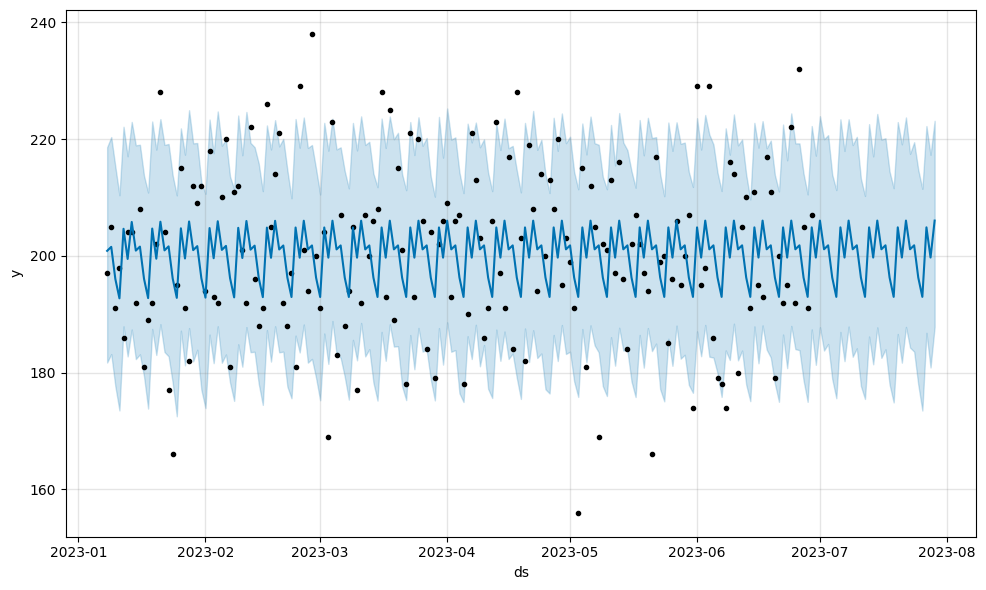

In [ ]:
model.plot(forecast);


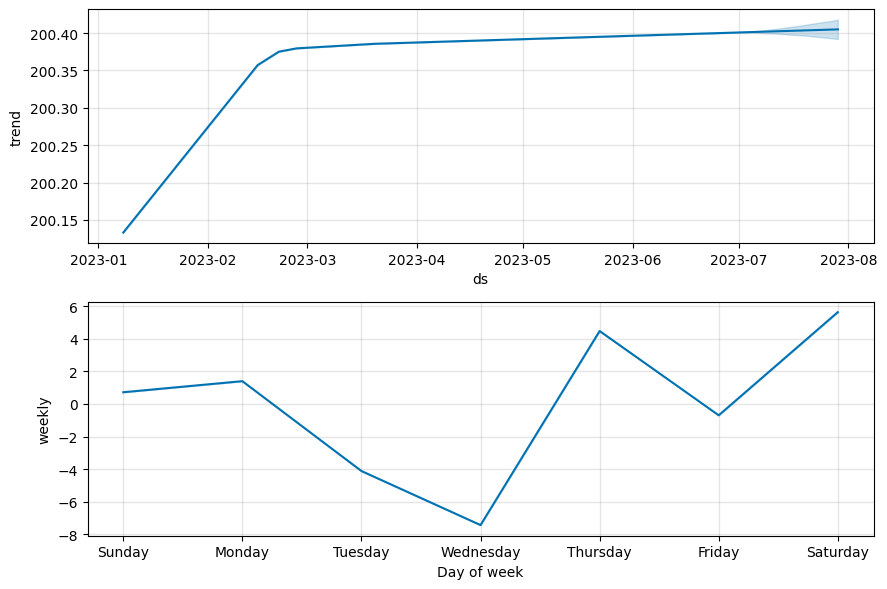

In [ ]:
model.plot_components(forecast);
